<a href="https://colab.research.google.com/github/hanifahputrr/californiahousing/blob/main/California_Housing_Analysis_and_Prediction_with_SVR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**California Housing Analysis and Prediction with Linear Regression, Random Forest and Support Vector Regression (SVR)**



Source Code:
https://jmyao17.github.io/Kaggle/California_Housing_Prices.html

https://www.kaggle.com/code/harrywang/housing-price-prediction/notebook

https://www.kaggle.com/code/ilialar/california-housing-analysis-and-preciction/notebook

Dataset:

**Latar Belakang**

Project ini dilakukan untuk mengaplikasikan model machine learning dalam analisis dan prediksi harga rumah dengan menggunakan dataset California Housing. Model machine learning yang digunakan ialah linear regression, random forest dan support vector regression dimana hasil dari masing-masing model akan dianalisis dan dibandingkan untuk mendapatkan hasil prediksi yang paling baik.

**1. Explanatory Data Analysis (EDA)**

In [ ]:
import pandas as pd
import numpy as np
import os
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

import warnings #untuk mengabaikan warning
warnings.filterwarnings('ignore')

In [ ]:
import numpy.random as rnd
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [ ]:
from sklearn.base import BaseEstimator,TransformerMixin,RegressorMixin

In [ ]:
from google.colab import files
files.upload()

Saving housing.csv to housing.csv


{'housing.csv': b'longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity\n-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY\n-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY\n-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY\n-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY\n-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY\n-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY\n-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY\n-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.12,241400.0,NEAR BAY\n-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY\n-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY\n-122.26,37.85,52.0,2202.0,434.0,910.0,402.0,3.2031,281500.0,NEAR BAY\n-122.26,37.85,52.0,3503.0,752.0,1504.0,734.0,3.2705,241800.0,NEAR BAY\n-

In [ ]:
housing=pd.read_csv('housing.csv')

In [ ]:
housing.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Data yang digunakan merupakan Dataset California Housing.csv yang terdiri dari 9 dan satu target yang dideskripsikan sebagai berikut.

1. Longitude & Latitude: Ukuran yang mendeskripsikan seberapa jauh ke barat dan utara sebuah rumah

2. Housing_median_age: Usia rata-rata sebuah rumah dalam satu blok

3. total_rooms: Jumlah total kamar dalam satu blok

4. total_bedrooms: Jumlah total kamar tidur dalam satu blok

5. population: Jumlah total orang yang tinggal dalam satu blok

6. households: Jumlah total rumah tangga, sekelompok orang yang tinggal dalam satu unit rumah (keluarga), untuk satu blok

7. median_income: Pendapatan rata-rata untuk rumah tangga dalam satu blok rumah (USD)

8. median_house_value: Nilai median rumah untuk rumah tangga dalam satu blok (USD)

9. ocean_proximity: jenis lokasi rumah berdasarkan kedekatan dengan laut

Karena prediksi yang dilakukan bertujuan untuk memprediksi harga rumah di blok tertentu, maka yang menjadi target adalah median_house_value.

Langkah selanjutnya adalah mencari informasi mengenai karakteristik dari data dengan menggunakan perintah housing.info dimana hasilnya ditunjukkan sebagai berikut.

In [ ]:
housing.info() #untuk mengetahui informasi karakteristik data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


Berdasarkan data diatas bisa kita lihat bahwa pada data total_bedrooms, terdapat 207 data yang kosong. Hal tersebut ditunjukkan dengan jumlahnya yang tidak seimbang dibanding jumlah dat pada variabel lainnya yang berjumlah 20640 data.

Tahap selanjutnya adalah mencari informasi statistik data dengan menggunakan perintah housing.describe() yang hasilnya ditunjukkan sebagai berikut.

In [ ]:
housing.describe() #melihat karakteristik statistik

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


Informasi statistik data yang diberikan untuk masing-masing variabel ialah jumlah data (count), mean, standar deviasi, nilai minimum dan maximum data dari tiap variabel, serta nilai distribusi 25%, 50% dan 75% dari data untuk setiap variabel.


Tahap selanjutnya adalah melihat visulaisasi distribusi data secara numerik dengan memplot histogram seperti yang ditunjukkan sebagai berikut.

array([[<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'latitude'}>,
        <AxesSubplot:title={'center':'housing_median_age'}>],
       [<AxesSubplot:title={'center':'total_rooms'}>,
        <AxesSubplot:title={'center':'total_bedrooms'}>,
        <AxesSubplot:title={'center':'population'}>],
       [<AxesSubplot:title={'center':'households'}>,
        <AxesSubplot:title={'center':'median_income'}>,
        <AxesSubplot:title={'center':'median_house_value'}>]],
      dtype=object)

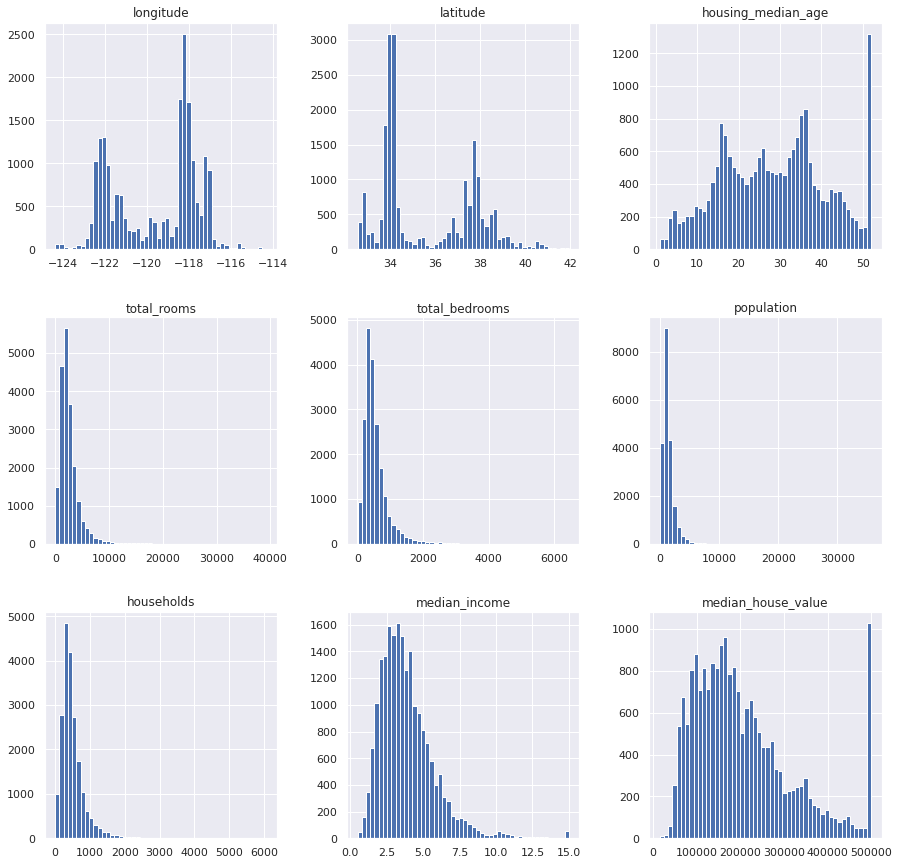

In [ ]:
housing.hist(bins=50, figsize=(15, 15))

berdasarkan visualisasi diatas, distribusi data numerik tidak normal (skewed) sehingga perlu dilakukan transformasi log untuk mentransformasi data sehingga memiliki distribusi yang normal.

karena **ocean_proximity** merupakan data yang berjenis **object**, maka kita perlu memeriksa nilai yang ada pada data tersebut

In [ ]:
housing['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64

Karnea ISLAND hanya memiliki lima data, maka akan dimasukkan ke dalam kelas lain pada tahap selanjutnya

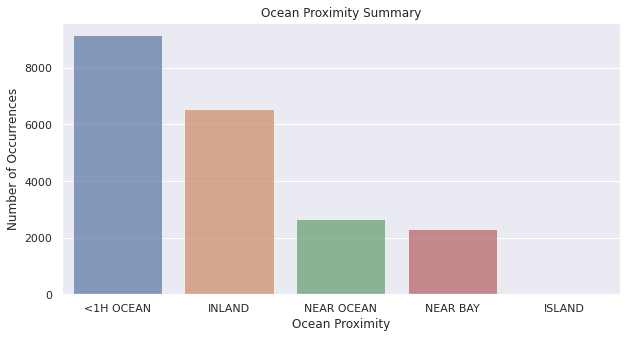

In [ ]:
op_count = housing['ocean_proximity'].value_counts()
plt.figure(figsize=(10,5))
sns.barplot(op_count.index, op_count.values, alpha=0.7)
plt.title('Ocean Proximity Summary')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Ocean Proximity', fontsize=12)
plt.show()

kemudian kita akan melihat distribusi target, yaitu median_house_value

<AxesSubplot:>

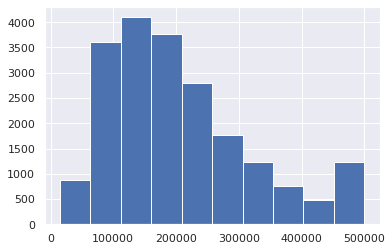

In [ ]:
housing['median_house_value'].hist()

Berdasarkan histrogam diatas, data target median_house_value memiliki distribusi yang tidak normal, selain itu terdapat nilai yang terpotong pada daerah harga 500.000 USD. Oleh karena itu perlu kita periksa datanya secara numerik

**Boxplot:**

boxplot digunakan untuk menunjukkan penyebaran dan pusat kumpulan data. Ukuran penyebaran termasuk rentang interkuartil dan rata-rata dari kumpulan data. Ukuran pusat (measures of center) termasuk mean atau rata-rata dan median (tengah kumpulan data).

<AxesSubplot:>

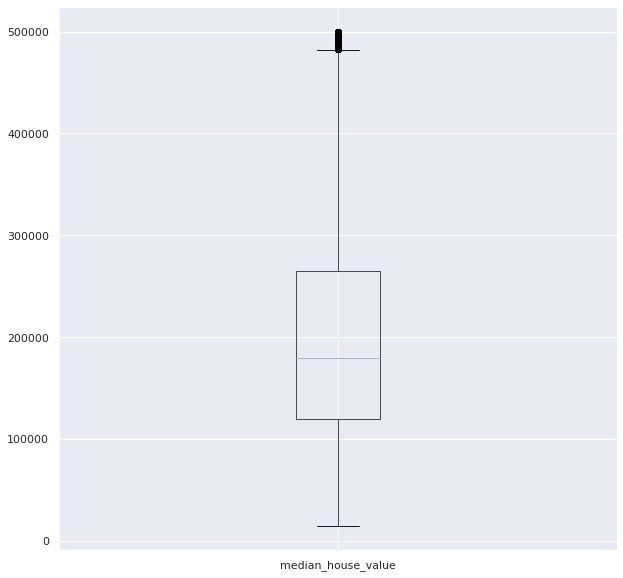

In [ ]:
housing.boxplot(['median_house_value'], figsize=(10, 10))

**Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size=0.2, random_state=0) #80:20
print(len(train_set), "train + ", len(test_set), "test")

16512 train +  4128 test


Normalisasi Target

In [ ]:
#Normalisasi distribusi dari train_df dan test_df

train_set['median_house_value_log']=np.log1p(train_set['median_house_value'])
test_set['median_house_value_log']=np.log1p(test_set['median_house_value'])

skewed_features=['households','median_income','population', 'total_bedrooms', 'total_rooms']
log_numerical_features=[]
for f in skewed_features:
    train_set[f + '_log']=np.log1p(train_set[f])
    test_set[f + '_log']=np.log1p(test_set[f])
    log_numerical_features.append(f + '_log')

array([[<AxesSubplot:title={'center':'households_log'}>,
        <AxesSubplot:title={'center':'median_income_log'}>],
       [<AxesSubplot:title={'center':'population_log'}>,
        <AxesSubplot:title={'center':'total_bedrooms_log'}>],
       [<AxesSubplot:title={'center':'total_rooms_log'}>, <AxesSubplot:>]],
      dtype=object)

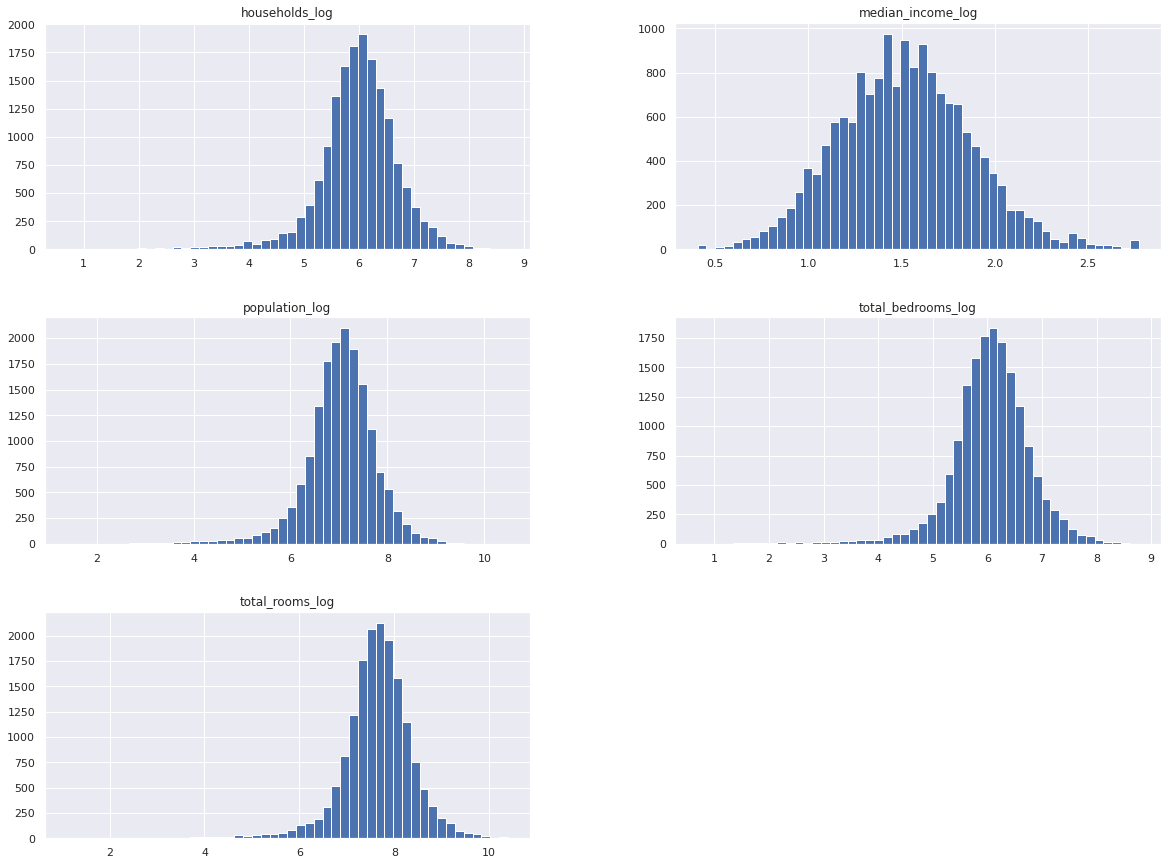

In [ ]:
#melihat visualisasi data yang telah terdistribusi normal
train_set[log_numerical_features].hist(bins=50, figsize=(20, 15))

In [ ]:
max_target = housing['median_house_value'].max()
print("The largest median value:",max_target)
print("The # of values, equal to the largest:", sum(housing['median_house_value']==max_target))
print("The % of values, equal to the largest:", sum(housing['median_house_value']==max_target)/housing.shape[0])

The largest median value: 500001.0
The # of values, equal to the largest: 965
The % of values, equal to the largest: 0.04675387596899225


In [ ]:
min_target = housing['median_house_value'].min()
print("The smallest median value:",min_target)
print("The # of values, equal to the smallest:", sum(housing['median_house_value']==min_target))
print("The % of values, equal to the smallest:", sum(housing['median_house_value']==min_target)/housing.shape[0])

The smallest median value: 14999.0
The # of values, equal to the smallest: 4
The % of values, equal to the smallest: 0.0001937984496124031


**Analisis Korelasi Antar Fitur**

Pertama-tama kita melakukan analisis korelasi fitur-fitur pada data dengan menggunakan heatmap

<AxesSubplot:>

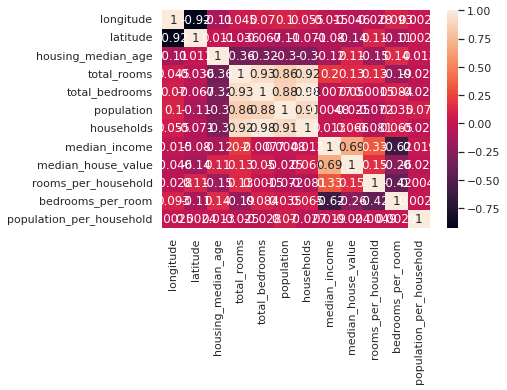

In [ ]:
sns.heatmap(housing.corr(),annot=True)

In [ ]:
# Pearson's r, aka, standard correlation coefficient for every pair
corr_matrix = housing.corr()
#memeriksa korelasi antar fitur dengan median house value
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

In [ ]:
# f_oneway() function takes the group data as input and
# returns F-statistic and P-value
from scipy.stats import f_oneway

# Running the one-way anova test between CarPrice and FuelTypes
# Assumption(H0) is that FuelType and CarPrices are NOT correlated

# Finds out the Prices data for each FuelType as a list
CategoryGroupLists=housing.groupby('ocean_proximity')['median_house_value'].apply(list)

# Performing the ANOVA test
# We accept the Assumption(H0) only when P-Value &gt; 0.05
AnovaResults = f_oneway(*CategoryGroupLists)
print('P-Value for Anova is: ', AnovaResults[1])

P-Value for Anova is:  0.0


In [ ]:
!pip install dython


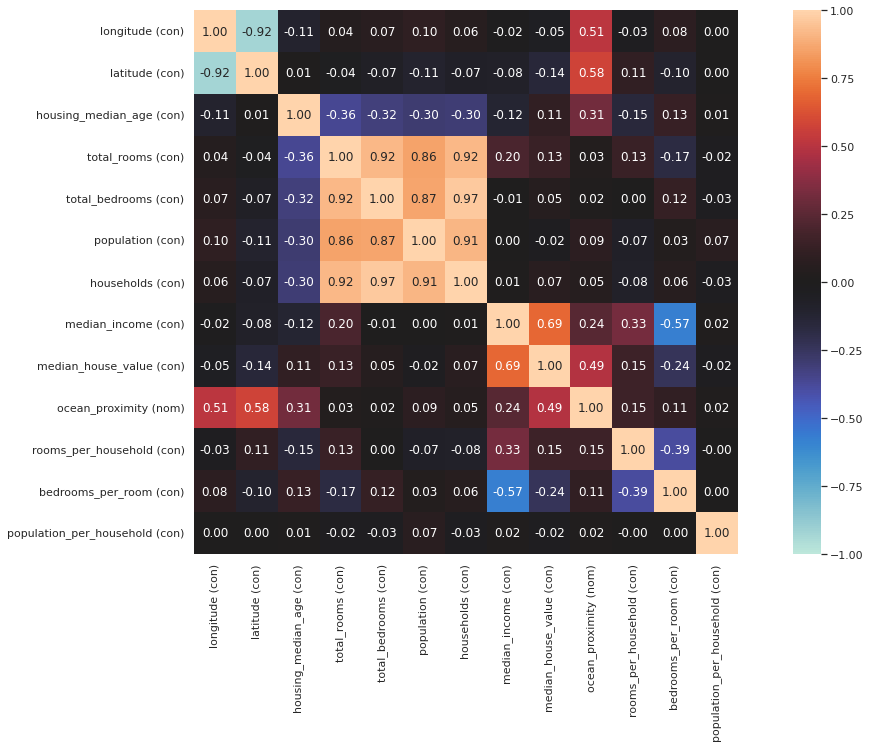

In [ ]:
from dython import nominal
nominal.associations(housing,figsize=(20,10),mark_columns=True);

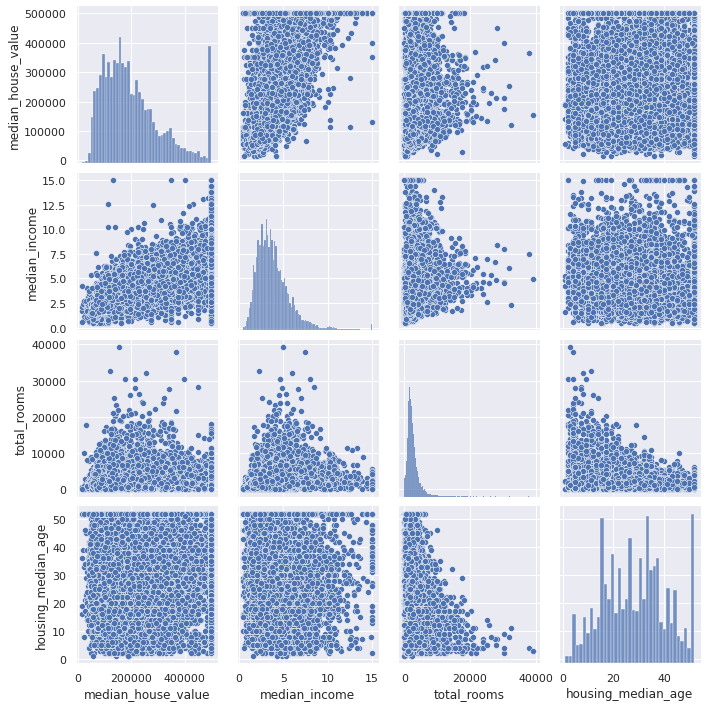

In [ ]:
sns.set()
sns.pairplot(housing[['median_house_value', 'median_income', 'total_rooms', 'housing_median_age']])

kemudian kita melihat visualisasi scatter plot dr target yaitu house median value

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='median_income', ylabel='median_house_value'>

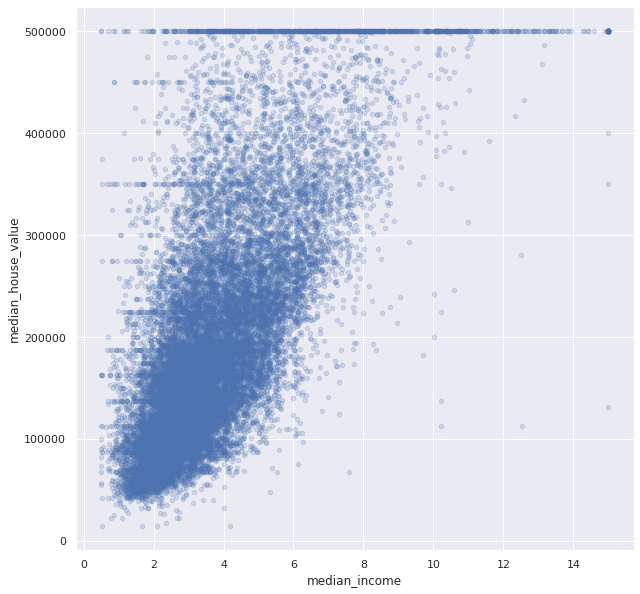

In [ ]:
housing.plot(kind='scatter', x='median_income', y='median_house_value', alpha=0.2, figsize=(10,10))

Hasil EDA:

1. Data jumlah total_rooms, population dan household jumlahnya masih masuk akal untuk blok tertentu, sehingga data pada variabel-variabel tersebut sudah sesuai.

2. Untuk data total_bedrooms terdapat 207 data yang kosong. Oleh karena itu data ini perlu diatasi pada tahap selanjutnya

3. distribusi data numerik tidak normal sehingga harus dilakukan transformasi agar data memiliki distribusi normal.

**2. Pre-processing Data**

kombinasi atribut (fitur)
jadi kita bikin fitur baru yaitu population_per_household, bedrooms_per_room dan population_per_house_holds

In [ ]:
# calculated attributes
housing['rooms_per_household'] = housing['total_rooms']/housing['households']
housing['bedrooms_per_room'] = housing['total_bedrooms']/housing['total_rooms']
housing['population_per_household'] = housing['population']/housing['households']

# checkout the correlations again
corr_matrix = housing.corr()
corr_matrix['median_house_value'].sort_values(ascending=False)

median_house_value          1.000000
median_income               0.688075
rooms_per_household         0.151948
total_rooms                 0.134153
housing_median_age          0.105623
households                  0.065843
total_bedrooms              0.049686
population_per_household   -0.023737
population                 -0.024650
longitude                  -0.045967
latitude                   -0.144160
bedrooms_per_room          -0.255880
Name: median_house_value, dtype: float64

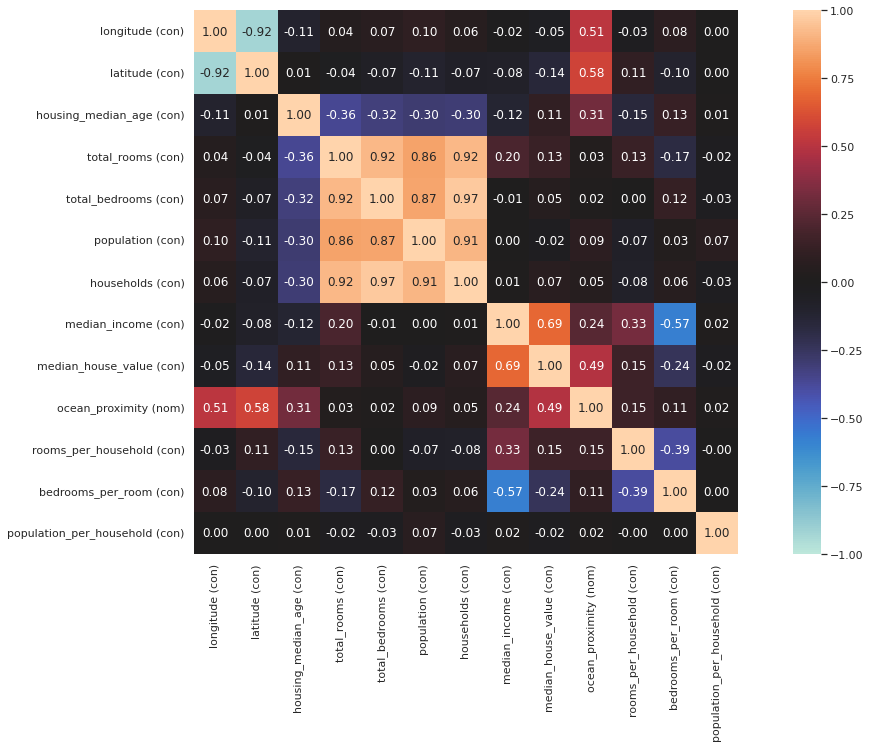

In [ ]:
nominal.associations(housing,figsize=(20,10),mark_columns=True);

In [ ]:
housing = train_set.drop("median_house_value", axis=1) # drop target labels for training set
housing_labels = train_set["median_house_value"].copy() # this is the target label vector
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12069 to 2732
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               16512 non-null  float64
 1   latitude                16512 non-null  float64
 2   housing_median_age      16512 non-null  float64
 3   total_rooms             16512 non-null  float64
 4   total_bedrooms          16354 non-null  float64
 5   population              16512 non-null  float64
 6   households              16512 non-null  float64
 7   median_income           16512 non-null  float64
 8   ocean_proximity         16512 non-null  object 
 9   median_house_value_log  16512 non-null  float64
 10  households_log          16512 non-null  float64
 11  median_income_log       16512 non-null  float64
 12  population_log          16512 non-null  float64
 13  total_bedrooms_log      16354 non-null  float64
 14  total_rooms_log         16512 non-n

In [ ]:
# using Scikit-Learn Imputer
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
#from sklearn.preprocessing import Imputer
#imputer = Imputer(strategy='median')

# remove non-numerical attributes for Imputer by making a copy of the dataframe
housing_num = housing.drop('ocean_proximity', axis=1)

imputer.fit(housing_num)  # this computes median for each attributes and store the result in statistics_ variable
imputer.statistics_  # same result as housing_num.median().values

array([-1.19563008e+02,  3.56247826e+01,  2.86190649e+01,  2.64014032e+03,
        5.37639110e+02,  1.42543774e+03,  4.99353319e+02,  3.87629834e+00,
        1.20864160e+01,  5.98321200e+00,  1.51772267e+00,  7.02406684e+00,
        6.05226032e+00,  7.62872927e+00])

In [ ]:
# see attributes with missing values
housing_num.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12069 to 2732
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               16512 non-null  float64
 1   latitude                16512 non-null  float64
 2   housing_median_age      16512 non-null  float64
 3   total_rooms             16512 non-null  float64
 4   total_bedrooms          16354 non-null  float64
 5   population              16512 non-null  float64
 6   households              16512 non-null  float64
 7   median_income           16512 non-null  float64
 8   median_house_value_log  16512 non-null  float64
 9   households_log          16512 non-null  float64
 10  median_income_log       16512 non-null  float64
 11  population_log          16512 non-null  float64
 12  total_bedrooms_log      16354 non-null  float64
 13  total_rooms_log         16512 non-null  float64
dtypes: float64(14)
memory usage: 1.9 MB

In [ ]:
x = imputer.transform(housing_num)  # this is a Numpy array
housing_tr = pd.DataFrame(x, columns=housing_num.columns)  # change a Numpy array to a DataFrame
housing_tr.info()  # no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16512 entries, 0 to 16511
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   longitude               16512 non-null  float64
 1   latitude                16512 non-null  float64
 2   housing_median_age      16512 non-null  float64
 3   total_rooms             16512 non-null  float64
 4   total_bedrooms          16512 non-null  float64
 5   population              16512 non-null  float64
 6   households              16512 non-null  float64
 7   median_income           16512 non-null  float64
 8   median_house_value_log  16512 non-null  float64
 9   households_log          16512 non-null  float64
 10  median_income_log       16512 non-null  float64
 11  population_log          16512 non-null  float64
 12  total_bedrooms_log      16512 non-null  float64
 13  total_rooms_log         16512 non-null  float64
dtypes: float64(14)
memory usage: 1.8 MB


selanjutnya kita menerapkan one-hot encoding untuk fitur kategorikal yaitu ocean_proximity

In [ ]:
# Approach 1
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
housing_cat = housing['ocean_proximity']
housing_cat.head()

12069       INLAND
15925     NEAR BAY
11162    <1H OCEAN
4904     <1H OCEAN
4683     <1H OCEAN
Name: ocean_proximity, dtype: object

In [ ]:
housing_cat_encoded = encoder.fit_transform(housing_cat)
housing_cat_encoded

array([1, 3, 0, ..., 4, 0, 1])

In [ ]:
print(encoder.classes_)  # '<1H OCEAN' is 0, 'INLAND' is 1, etc.

['<1H OCEAN' 'INLAND' 'ISLAND' 'NEAR BAY' 'NEAR OCEAN']


In [ ]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()  # don't forget the ()!!!
housing_cat_1hot = encoder.fit_transform(housing_cat_encoded.reshape(-1,1))  # this returns a sparse SciPy matrix
housing_cat_1hot.toarray()  # convert the sparse matrix to numpy array

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.],
       [1., 0., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.]])

In [ ]:
# Combine Approch 1 and 2 in one shot
from sklearn.preprocessing import LabelBinarizer
encoder = LabelBinarizer()
housing_cat_1hot = encoder.fit_transform(housing_cat)
housing_cat_1hot

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 1, 0],
       [1, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 1],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0]])

**Custom Transformers**

Anda mungkin perlu mengembangkan trafo khusus - Anda cukup menulis fungsi sederhana untuk itu atau jika Anda ingin trafo Anda bekerja dengan Scikit-Learn, Anda perlu mengembangkan trafo sebagai kelas.

In [ ]:
# A custom transformer
from sklearn.base import BaseEstimator, TransformerMixin
rooms_ix, bedrooms_ix, population_ix, household_ix = 3, 4, 5, 6  # hardcoded just for this dataset

class CombineAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room=True):
        self.add_bedrooms_per_room = add_bedrooms_per_room

    def fit(self, X, y=None):
        return self

    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:, household_ix]
        population_per_household = X[:, population_ix] / X[:, household_ix]
        if self.add_bedrooms_per_room:
            bedrooms_per_room = X[:, bedrooms_ix] / X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedrooms_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]


housing.head()  # note that rooms_per_household, and population_per_household already calculated before

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value_log,households_log,median_income_log,population_log,total_bedrooms_log,total_rooms_log
12069,-117.55,33.83,6.0,502.0,76.0,228.0,65.0,4.2386,INLAND,13.122367,4.189655,1.656054,5.433722,4.343805,6.220590
15925,-122.44,37.73,52.0,2381.0,492.0,1485.0,447.0,4.3898,NEAR BAY,12.506181,6.104793,1.684508,7.303843,6.200509,7.775696
11162,-118.00,33.83,26.0,1718.0,385.0,1022.0,368.0,3.9333,<1H OCEAN,12.186385,5.910797,1.596008,6.930495,5.955837,7.449498
4904,-118.26,34.01,38.0,697.0,208.0,749.0,206.0,1.4653,<1H OCEAN,11.685205,5.332719,0.902314,6.620073,5.342334,6.548219
4683,-118.36,34.08,52.0,2373.0,601.0,1135.0,576.0,3.1765,<1H OCEAN,12.323860,6.357842,1.429474,7.035269,6.400257,7.772332


In [ ]:
attr_adder = CombineAttributesAdder(add_bedrooms_per_room=False)  # add_bedrooms_per_room is called a hyperparameter
data_extra_attribs = attr_adder.transform(housing.values)  # data.values is the numpy N-array representation of the DataFrame
data_extra_attribs

array([[-117.55, 33.83, 6.0, ..., 6.220590170099739, 7.723076923076923,
        3.5076923076923077],
       [-122.44, 37.73, 52.0, ..., 7.775695749915245, 5.32662192393736,
        3.3221476510067114],
       [-118.0, 33.83, 26.0, ..., 7.449498005382849, 4.668478260869565,
        2.777173913043478],
       ...,
       [-121.9, 36.58, 31.0, ..., 7.266827347520591, 3.6412213740458017,
        1.7913486005089059],
       [-117.93, 33.62, 34.0, ..., 7.661997558901893, 4.5405982905982905,
        2.247863247863248],
       [-115.56, 32.8, 15.0, ..., 7.066466970136958, 3.9295302013422817,
        3.436241610738255]], dtype=object)

In [ ]:
# check the stats of the training set for feature scaling
housing_tr.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value_log,households_log,median_income_log,population_log,total_bedrooms_log,total_rooms_log
count,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000,16512.000000
mean,-119.563008,35.624783,28.619065,2640.140322,537.639110,1425.437742,499.353319,3.876298,12.086416,5.983212,1.517723,7.024067,6.052260,7.628729
std,2.005251,2.136552,12.600999,2186.893548,420.309642,1143.062756,382.482829,1.906783,0.570042,0.728726,0.360007,0.737650,0.726714,0.753944
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,9.615805,0.693147,0.405398,1.386294,0.693147,1.098612
25%,-121.800000,33.930000,18.000000,1448.000000,295.000000,785.000000,279.000000,2.566625,11.695255,5.634790,1.271620,6.666957,5.690359,7.278629
50%,-118.490000,34.250000,29.000000,2127.000000,438.000000,1166.000000,409.500000,3.548500,12.102106,6.017375,1.514798,7.062192,6.068426,7.662938
75%,-118.000000,37.710000,37.000000,3149.000000,644.000000,1724.000000,605.000000,4.747575,12.486356,6.406880,1.748778,7.452982,6.469250,8.055158
max,-114.310000,41.950000,52.000000,32627.000000,6445.000000,35682.000000,6082.000000,15.000100,13.122367,8.713253,2.772595,10.482430,8.771215,10.392926


**Feature Scalling**

In [ ]:
# Transformation Pipeline
# name/estimator pairs for pipeline steps
# each estimator except the last one must be transformers with fit_transform() method
# pipeline fit() calls each fit_transform() of each estimator and fit() for the last estimator
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
#imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

num_pipeline = Pipeline([
    ('imputer',SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

housing_num_tr = num_pipeline.fit_transform(housing_num)

Scikit-Learn only handles Numpy arrays not Pandas Dataframes, we can create another transformer so that we can feed the pipeline a DataFrame

In [ ]:
# this is the fix to the problem at https://stackoverflow.com/questions/46162855/fit-transform-takes-2-positional-arguments-but-3-were-given-with-labelbinarize
# CategoricalEncoder should be used instead of LabelEncoder in the latest version of Scikit-Learn
# Definition of the CategoricalEncoder class, copied from PR #9151.
# Just run this cell, or copy it to your code, do not try to understand it (yet).

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [ ]:
# given a list of attributes names, this transformer converts the dataframe to a numpy array
from sklearn.base import BaseEstimator, TransformerMixin

class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X[self.attribute_names].values

In [ ]:
# create two pipelines and use feture union to join them
num_attribs = list(housing_num)
cat_attribs = ['ocean_proximity']

num_pipeline = Pipeline([
    ('selector', DataFrameSelector(num_attribs)),
    ('imputer', SimpleImputer(missing_values=np.nan, strategy='mean')),
    ('attribs_adder', CombineAttributesAdder()),
    ('std_scaler', StandardScaler()),
])

cat_pipeline = Pipeline([
    ('selector', DataFrameSelector(cat_attribs)),
    ('label_binarizer', CategoricalEncoder()),
    # ('label_binarizer', LabelBinarizer()),  # LabelBinarizer does not work this way with last Scikit-Learn
])

In [ ]:
housing_num_tr = num_pipeline.fit_transform(housing)
housing_num_tr.shape
num_attribs

['longitude',
 'latitude',
 'housing_median_age',
 'total_rooms',
 'total_bedrooms',
 'population',
 'households',
 'median_income',
 'median_house_value_log',
 'households_log',
 'median_income_log',
 'population_log',
 'total_bedrooms_log',
 'total_rooms_log']

In [ ]:
housing_cat_tr = cat_pipeline.fit_transform(housing)
housing_cat_tr

<16512x5 sparse matrix of type '<class 'numpy.float64'>'
	with 16512 stored elements in Compressed Sparse Row format>

In [ ]:
from sklearn.pipeline import FeatureUnion

full_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', num_pipeline),
    ('cat_pipeline', cat_pipeline),
])

# run the whole pipeline
housing_prepared = full_pipeline.fit_transform(housing)
housing_prepared.shape

(16512, 22)

**SVR**

In [ ]:
from sklearn.svm import SVR

In [ ]:
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split
from sklearn.model_selection import GridSearchCV

In [ ]:
svr=SVR(degree=2)
param_grid={
    'C':[1,10,50,100]
}
scoring='r2'
grid=GridSearchCV(svr,param_grid,scoring=scoring,n_jobs=-1,cv=3,verbose=3)
grid.fit(housing_prepared,housing_labels)

Fitting 3 folds for each of 4 candidates, totalling 12 fits


GridSearchCV(cv=3, estimator=SVR(degree=2), n_jobs=-1,
             param_grid={'C': [1, 10, 50, 100]}, scoring='r2', verbose=3)

In [ ]:
print(grid.best_params_)
#print(grid.best_score_)

{'C': 100}


In [ ]:
svr=SVR(degree=2,C=10)
scores=cross_val_score(svr,housing_prepared,housing_labels,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())

R2:  0.1933777650252266


In [ ]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
sc_y = StandardScaler()
X = sc_X.fit_transform(X)
Y = sc_y.fit_transform(y)

NameError: ignored